##  ML model that optimizes to predict patient with heart disease using the RandomForest, Linear SVC classifier.


**Target Parameter Optimization: Precision, Accuracy**

##### Problem type: Classification
##### Models
##### A. RandomForest
##### B. Linear SVC

 **Methodology**

1. Getting the data ready
2. Choose the right estimator(model)/algorithm for the problem
3. Model/algorithm fitting to make predictions on data
4. Evaluating the model
5. Improve the model
6. Save and load the trained model
7. Integrate all*

#### 1. Getting the data ready


In [78]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
heart_disease= pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [81]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [80]:
heart_disease.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [2]:
#Create a (feature matrix) x
x = heart_disease.drop("target", axis=1)
y= heart_disease["target"]

print(x)



      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [3]:
#sc = MinMaxScaler(feature_range=(0,1))
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

In [4]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

#### 2. Choose the right model and hyperparameters 




#### A. RandomForestClassifier

In [5]:
import sklearn
sklearn.show_versions()

C:\Users\Fresh\ANACONDA 2022\lib\site-packages\_distutils_hack\__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")



System:
    python: 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\Fresh\ANACONDA 2022\python.exe
   machine: Windows-10-10.0.19041-SP0

Python dependencies:
          pip: 21.2.4
   setuptools: 61.2.0
      sklearn: 1.0.2
        numpy: 1.21.5
        scipy: 1.7.3
       Cython: 0.29.28
       pandas: 1.4.2
   matplotlib: 3.5.1
       joblib: 1.1.0
threadpoolctl: 2.2.0

Built with OpenMP: True


In [6]:
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier(n_estimators=100)

#We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### 3. Model Fitting

In [7]:
 #Split the data into training and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2
                            
                                                )

In [8]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((820, 13), (205, 13), (820,), (205,))

In [9]:
clf.fit(x_train, y_train)

RandomForestClassifier()

#### 5. Evaluating the RandomForest classifier  

#### Classification Report

In [10]:
clf.score(x_train, y_train)

1.0

In [11]:
clf.score(x_test, y_test)

1.0

In [12]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
y_preds = clf.predict(x_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00       114

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [13]:
confusion_matrix(y_test, y_preds)

array([[ 91,   0],
       [  0, 114]], dtype=int64)

In [14]:
accuracy_score(y_test, y_preds)

1.0

#### Save the model and load it

In [16]:
import pickle
pickle.dump(clf, open("random_forest_model_1.pk1", "wb"))

In [17]:
loaded_model= pickle.load(open("random_forest_model_1.pk1", "rb"))
loaded_model.score(x_test, y_test)

1.0

### Test to compare Predictions

In [18]:
y_preds=clf.predict(x_test)
y_preds[:10]

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

In [19]:
np.array(y_test[:10])

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

**Compare the predictions to the truth**

In [20]:

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.0

#### b) Scoring Parameter

**Evaluating metrics**
 i. accuracy
ii. precision
iii.recall
iv. f1

In [21]:
from sklearn.model_selection import cross_val_score
np.random.seed(42)
cv_scp= cross_val_score(clf, x,y, cv=5, scoring =None)
cv_scp
# cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_scp)*100:.2f}%")



The cross-validated accuracy is: 99.71%


In [23]:
# ii. Precision
cv_precision= cross_val_score(clf, x,y, cv=5, scoring ="precision")
np.mean(cv_precision)

0.9889398572884811

In [24]:
#iii. Recall
cv_recall= cross_val_score(clf, x,y, cv=5, scoring ="recall")
np.mean(cv_recall)

1.0

In [25]:
#iv. f1
cv_f1= cross_val_score(clf, x,y, cv=5, scoring ="f1")
np.mean(cv_f1)

0.9943107516009437

### Option2: Using another estimator for classification 

### B. Linear SVC

sklearn link: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

In [26]:
#import the linearsvc estimator class

In [27]:
from sklearn.svm import LinearSVC

#setup random seed
np.random.seed(42)
#Make the data
x= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

#split the data

x_train, x_test, y_train,y_test= train_test_split(x,y, test_size=0.2)
#Instatiate linear SVC
clf1=LinearSVC(max_iter=1000)

#fit the model to the data (train the machine learning model)
clf1.fit(x_train,y_train)

#Evaluate the LinearSVC(patterns from learned data)
clf1.score(x_test, y_test)

C:\Users\Fresh\ANACONDA 2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7951219512195122

In [28]:
heart_disease["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

**Make the Predictions**

#Let's make predictions on the test data

In [29]:
clf1.predict(x_test)

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [30]:
np.array(y_test)

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

# Compare the predictions to the truth labels to evaluate the model

In [31]:
y_preds=clf1.predict(x_test)
np.mean(y_preds == y_test)

0.7951219512195122

In [32]:
clf1.score(x_test, y_test)

0.7951219512195122

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.7951219512195122

#### Evaluating the Linear SVC model



​

**Evaluation Metrics**

1. **Score Parameters**:
     'accuracy',
     'average precision',
     'recall',
     'f1' 
2. **Metric functions**
    AUC/ROC score ,  '
    Confusion matrix,
    Classification report


##### 1. Source Parameter- cross_validation


# On the Linear SVC

In [34]:
from sklearn.model_selection import cross_val_score
np.random.seed(42)
clf1=LinearSVC(max_iter=1000)

#let's parse the scoring parameter

cross_val_score(clf1, x, y, cv=5, scoring=None)

C:\Users\Fresh\ANACONDA 2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Fresh\ANACONDA 2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Fresh\ANACONDA 2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Fresh\ANACONDA 2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Fresh\ANACONDA 2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([0.8195122 , 0.85365854, 0.74634146, 0.74634146, 0.51707317])

# On the RandomForest

In [35]:
cross_val_score(clf, x, y, cv=5, scoring=None)

array([1.        , 1.        , 1.        , 1.        , 0.98536585])

**i. Accuracy**

# On the Linear SVC

In [36]:
#i. Accuracy
clf_cross_val_score1=np.mean(cross_val_score(clf1, x, y, cv=5, scoring="accuracy"))
clf_cross_val_score1


C:\Users\Fresh\ANACONDA 2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Fresh\ANACONDA 2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Fresh\ANACONDA 2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Fresh\ANACONDA 2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Fresh\ANACONDA 2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7726829268292683

# On the RandomForest

In [37]:
clf_cross_val_score1b=np.mean(cross_val_score(clf, x, y, cv=5, scoring="accuracy"))
accuracy=clf_cross_val_score1b
accuracy

0.9941463414634146

# On the Linear SVC

**ii.precision**

In [38]:
#ii. precision
clf_cross_val_score2=np.mean(cross_val_score(clf1, x, y, cv=5, scoring="precision"))
clf_cross_val_score2

C:\Users\Fresh\ANACONDA 2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Fresh\ANACONDA 2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Fresh\ANACONDA 2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Fresh\ANACONDA 2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Fresh\ANACONDA 2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.75931659365874

In [39]:
# On the RandomForest

In [40]:
#ii. precision
clf_cross_val_score2=np.mean(cross_val_score(clf, x, y, cv=5, scoring="precision"))
precision=clf_cross_val_score2
precision

0.9944954128440366

**iii.Recall**

# On the Linear SVC

In [41]:
#iii. Recall
cross_val_score3=cross_val_score(clf1, x, y, cv=5, scoring="recall" )
np.mean(cross_val_score3)

C:\Users\Fresh\ANACONDA 2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Fresh\ANACONDA 2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Fresh\ANACONDA 2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Fresh\ANACONDA 2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Fresh\ANACONDA 2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9182749326145553

# On the RandomForest

In [42]:
#iii. Recall
cross_val_score3=cross_val_score(clf, x, y, cv=5, scoring="recall" )
Recall=np.mean(cross_val_score3)
Recall

1.0

**iv.f1**

# On the Linear SVC

In [43]:
#iv. f1
clf_cross_val_score4=np.mean(cross_val_score(clf1, x, y, cv=5, scoring="f1"))
clf_cross_val_score4

C:\Users\Fresh\ANACONDA 2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Fresh\ANACONDA 2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Fresh\ANACONDA 2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Fresh\ANACONDA 2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Fresh\ANACONDA 2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8449883276464764

# On the RandomForest

In [44]:
#iv. f1
clf_cross_val_score4=np.mean(cross_val_score(clf, x, y, cv=5, scoring="f1"))
f1=clf_cross_val_score4
f1

0.9972093023255815

In [45]:
print(f"Heart Disease Classifier Cross-validated Accuracy Linear SVC: {(clf_cross_val_score1 * 100):.2f}%")
print(f"Heart Disease Classifier Cross-validated Accuracy RandomForest:{(clf_cross_val_score1b * 100):.2f}%")

Heart Disease Classifier Cross-validated Accuracy Linear SVC: 77.27%
Heart Disease Classifier Cross-validated Accuracy RandomForest:99.41%


Comments: From several iterations,the Linear SVC model have about 75% likelihood of predicting the right label i.e about 7 out of 10 times while the RandomForest have over 90% likelihood

In [46]:
Dict1=[{"Accuracy": accuracy, "Precision":precision,"Recall":Recall,"F1":f1}]
cross_val_before_improvement= pd.DataFrame(Dict1)
cross_val_before_improvement

,Accuracy,Precision,Recall,F1
0,0.994146,0.994495,1.0,0.997209


#### RandomForestClassifier evaluation using AUC/ROC

#### 2. Metric functions

**i. AUC/ROC**

In [47]:
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier(n_estimators=100)

In [48]:
 #Split the data into training and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2
                            
                                                )

In [49]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [50]:
from sklearn.metrics import roc_curve

#make predictions with probabilities
y_prob = clf.predict_proba (x_test)

y_prob[:10], len(y_prob)

(array([[1.  , 0.  ],
        [0.19, 0.81],
        [0.75, 0.25],
        [1.  , 0.  ],
        [0.04, 0.96],
        [0.13, 0.87],
        [0.01, 0.99],
        [0.99, 0.01],
        [0.31, 0.69],
        [0.99, 0.01]]),
 205)

In [51]:
 y_prob_positive = y_prob[:,1]
y_prob_positive[:10]

array([0.  , 0.81, 0.25, 0.  , 0.96, 0.87, 0.99, 0.01, 0.69, 0.01])

In [52]:
#Calculate fpr, tpr, thresholds
fpr, tpr, thresholds=roc_curve(y_test, y_prob_positive)

#check the false positive rates
fpr



array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05940594, 0.11881188, 0.14851485, 0.18811881,
       0.20792079, 0.28712871, 0.2970297 , 0.32673267, 0.43564356,
       0.5049505 , 0.56435644, 0.76237624, 1.        ])

In [53]:
tpr

array([0.        , 0.17307692, 0.32692308, 0.41346154, 0.50961538,
       0.57692308, 0.625     , 0.66346154, 0.69230769, 0.70192308,
       0.78846154, 0.80769231, 0.81730769, 0.83653846, 0.86538462,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

In [54]:
thresholds

array([2.  , 1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91,
       0.9 , 0.89, 0.87, 0.84, 0.69, 0.25, 0.21, 0.18, 0.12, 0.11, 0.08,
       0.07, 0.05, 0.04, 0.03, 0.02, 0.01, 0.  ])

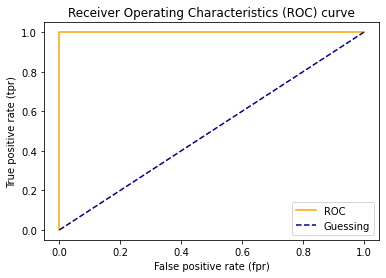

In [55]:
#Create a function for plotting ROC Curve

import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    """
    plots a ROC curve given the fpr and tpr of the model
    """
    #Plot Roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    #Plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color='darkblue', linestyle="--", label="Guessing")
    
    #Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title('Receiver Operating Characteristics (ROC) curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)
    

In [56]:
 from sklearn.metrics import roc_auc_score
    
 roc_auc_score(y_test, y_prob_positive)

1.0

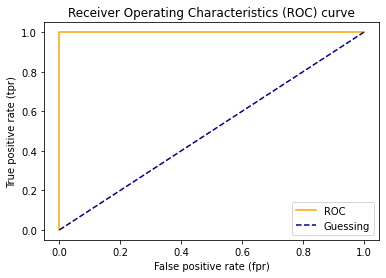

In [57]:
#plot a perfect ROC curve and AUC score
fpr, tpr, thresholds= roc_curve(y_test,y_test)
plot_roc_curve (fpr,tpr)

In [58]:
#perfect AUC score
roc_auc_score(y_test, y_test)

1.0

##### ii. Confusion Matrix


In [59]:
from sklearn.metrics import confusion_matrix
y_preds= clf.predict(x_test)
confusion_matrix(y_test, y_preds)

array([[101,   0],
       [  0, 104]], dtype=int64)

In [60]:
#visualize the matrix with pandas.crosstab()
pd.crosstab(y_test, y_preds, rownames=["Actual labels"],
            colnames= ["Predicted Labels"])

Predicted Labels,0,1
Actual labels,,
0,101,0
1,0,104


In [61]:
21+4+6+30


61

In [62]:
len(x_test)

205

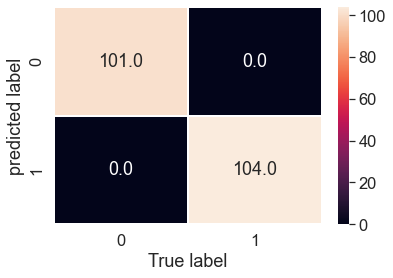

In [63]:
#Make the confusion matrix more visual with heatmap

import seaborn as sns
#set the font scale
sns.set(font_scale=1.5)
#create a confusion matrix
con_mat= confusion_matrix(y_test,y_preds)
#plot it using seaborn
sns.heatmap(con_mat, annot=True,fmt=".1f",linewidth=.1)
plt.xlabel("True label")
plt.ylabel("predicted label");

**iii. Classification Report**

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00       104

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



 Comment: visit the sklearn module webpage to understand the headings
 Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
Hands on Model Improvement

In [68]:
#split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2)
# instantiate RandomForestClassifier
clf=RandomForestClassifier(n_jobs=None)
#setup GridsearchCV
rs_clf = GridSearchCV(estimator=clf, param_grid=grid, #number of models to try 
                                cv=5, verbose=2)
    #Fit the GridsearchCV version of clf
rs_clf.fit(x_train, y_train);

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n

In [69]:
rs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [70]:
#Let's now use the best parameter to train the model
from sklearn.model_selection import GridSearchCV
#create a dictionary with the hyperparameters we'll like to adjust
grid = {"n_estimators": [100],
        "max_depth": [None],
        "max_features": ["sqrt"],
        "min_samples_split": [6],
        "min_samples_leaf": [2]}


In [71]:
#split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2)
# instantiate RandomForestClassifier
rs_clf=RandomForestClassifier(n_jobs=None)
#setup GridsearchCV
rs_clf = GridSearchCV(estimator=rs_clf, param_grid=grid, #number of models to try 
                                cv=5, verbose=2)
    #Fit the GridsearchCV version of clf
rs_clf.fit(x_train, y_train);

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s


In [72]:
#Create an evaluation function
def evaluate_preds(y_true, rs_y_preds):
    
    accuracy=accuracy_score(y_true, rs_y_preds)
    precision=precision_score(y_true, rs_y_preds)
    recall=recall_score(y_true, rs_y_preds)
    
    metric_dict ={"accuracy": round(accuracy, 2),
                "precision": round(precision, 2),
                "recall": round(recall, 2),
                "f1": round(f1, 2)}
   
    
    
    
    print(f"Acc: {accuracy*100:.2f}%")
    print(f"precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

  **Compare our diffrent models metrics**

In [73]:


Dict2 = [{'Accuracy': accuracy, "Precision": precision,"Recall":Recall,  "F1":f1}]
cross_val_after_improvement=pd.DataFrame(Dict2)
cross_val_after_improvement

,Accuracy,Precision,Recall,F1
0,0.994146,0.994495,1.0,0.997209


Text(0.5, 1.0, 'cross val after model improvement')

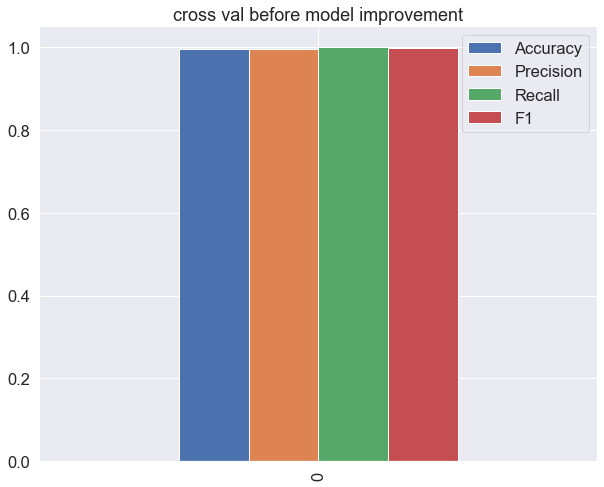

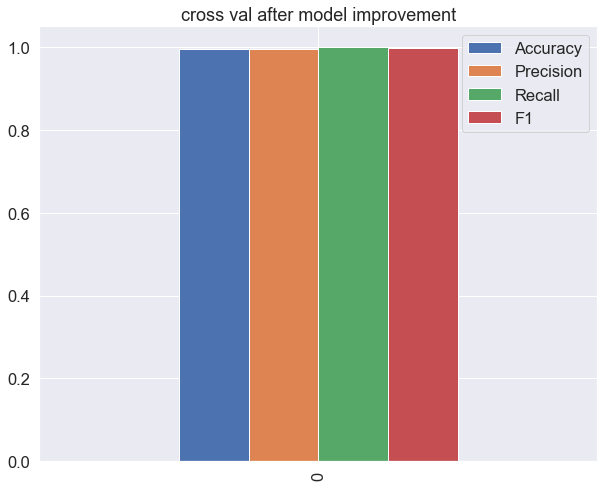

In [74]:

cross_val_before_improvement.plot.bar(figsize=(10,8));

plt.title("cross val before model improvement")

cross_val_after_improvement.plot.bar(figsize=(10,8));

plt.title("cross val after model improvement")


#### 6. Saving and Loading the trained models
1. with python's pickle module
2. joblib


**joblib**

In [75]:
clf=RandomForestClassifier()
clf.fit(x_test, y_preds)
import pickle
import joblib

#save an existing model to file
joblib.dump(clf, open("RRs_random_Random_Forest_model.joblib","wb"))
joblib.dump(sc, open("Random_scaled.joblib", "wb"))


In [76]:
#Load a saved model
loaded_model = joblib.load(open("RRs_random_Random_Forest_model.pkl","rb"))
loaded_scaled_model = joblib.load(open("Random_sc.joblib","rb"))

**Make some predictions with the model**

In [77]:
#Make predictions

input_data = (52,1,0,125,212,0,1,168,0,1,2,2,3)

#changing the input_data to numpy array
input_data_as_numpy_array =np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction == 0):
    print('The patient does not have a heart disese')
else:
    print('The patient may have a heart disease')



[1]
The patient may have a heart disease


C:\Users\Fresh\ANACONDA 2022\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
